### 코루틴 - 개요

일반적인 경우에는 코드에서 메인 루틴으로부터 서브루틴을 호출하면 서브루틴 코드 실행 뒤 다시 메인 루틴으로 돌아온다.
또한 서브루틴이 끝나면 서브루틴 내용은 메모리에서 삭제된다.

코루틴(coroutine)은 cooperative routine를 의미하는데 서로 협력하는 루틴관계를 의미한다.
메인루틴과 서브루틴처럼 종속된 관계가 아니라 서로 대등한 관계이며 특정 시점에 상대방의 코드를 서로 실행할 수 있다.

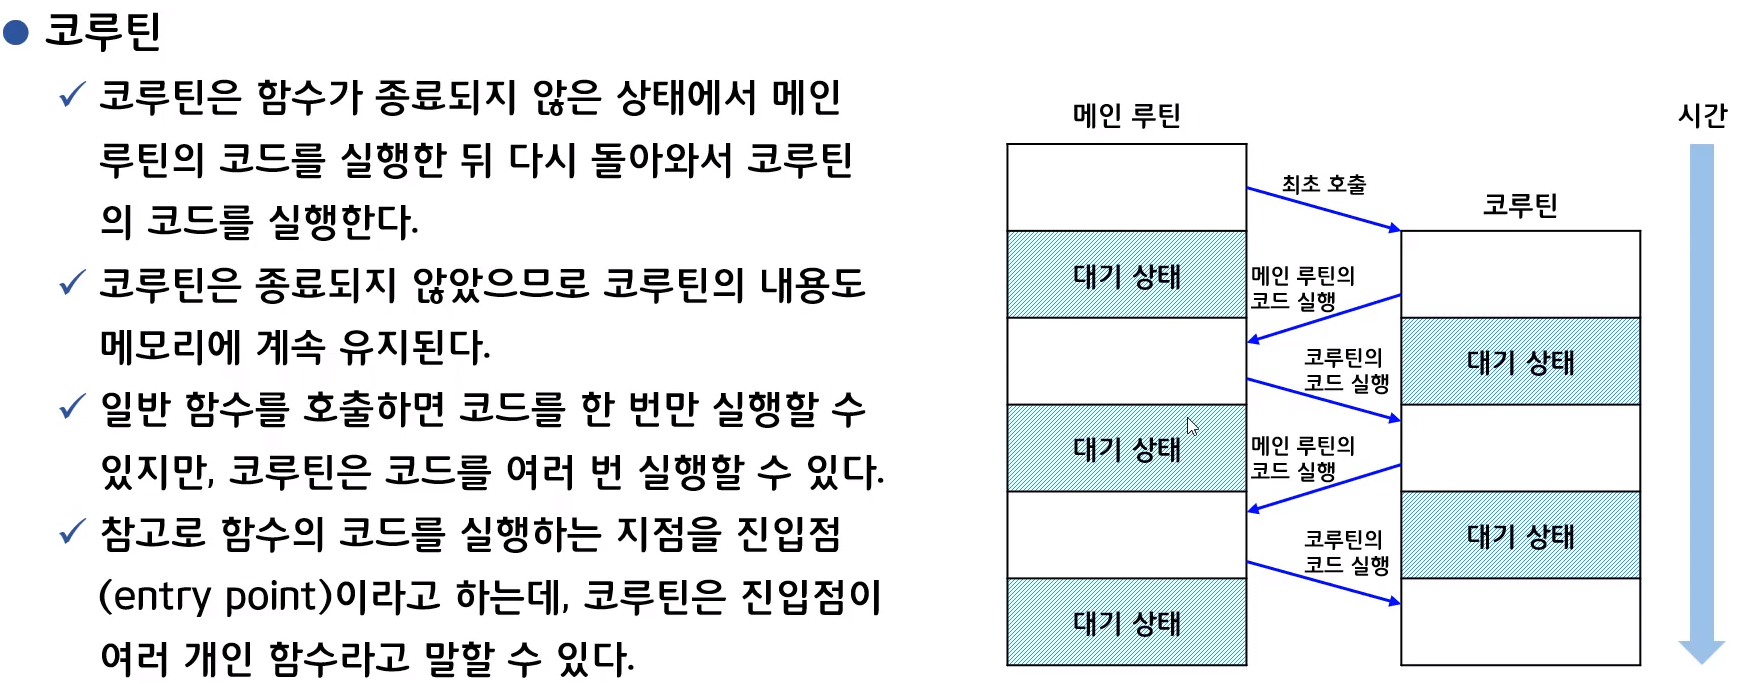

In [134]:
# 코루틴 값 전송
# 코루틴은 제네레이터의 특별한 형태로 기존의 제네레이터는 yield로 값을 발생시켰지만 코루틴은 yield로 외부값을 받아올 수 있다.
# 코루틴에 값을 전달하려면 send method를 사용하면 된다.
# send method가 전달한 값을 받으려면 yield를 괄호로 묶어준 뒤, 변수에 저장하여 사용하면 된다.

def number_coroutine():
    while True:
        x = (yield) #이 때는 외부로 부터 값을 전달 받는 목적으로 yield를 사용
        print(x)
        
co = number_coroutine()
next(co) # next() 는 __next__()와 동일한 역할을 함 => 이 코드는 위 코드상 x = (yield) 에서 값을 기다리는 상태로 됨

co.send(1) #send()함수로 yield로 값을 전달 함
co.send(2)
co.send(3)
co.close() #coroutine 종료는 close()함수로 할 수 있다.

1
2
3


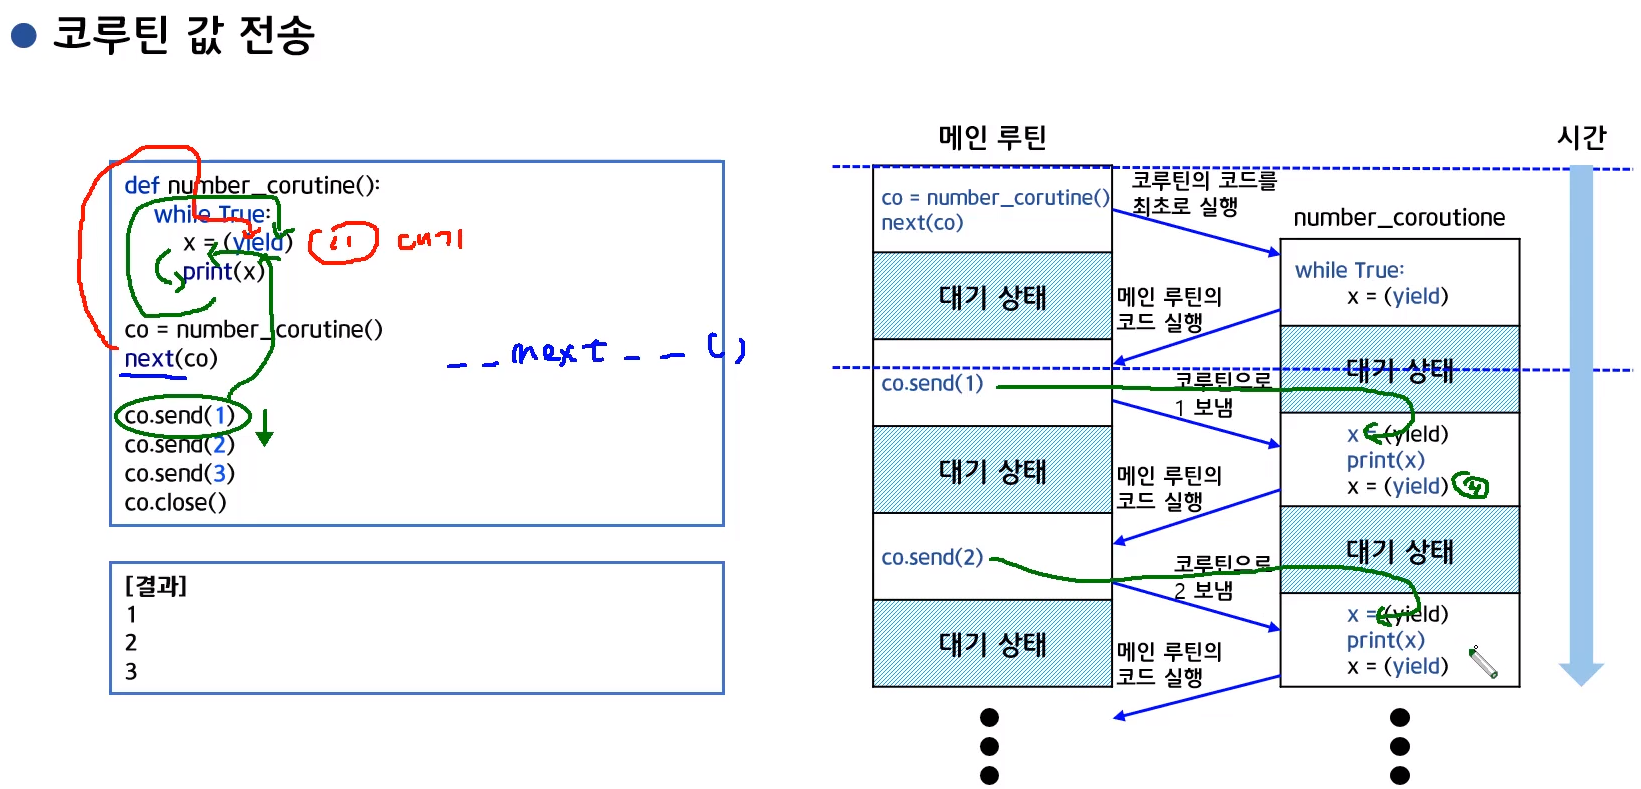

In [136]:
# 이번엔 yield를 이용하여 값을 입력 + 바깥으로 넘기는 형태도 한번 해 보자
# yield를 괄호로 묶어서 "yield 변수" 형식으로 yield에 변수를 지정한 뒤 괄호로 묶어 주면 값을 받아오면서 바깥으로 값을 리턴 해 준다.

def number_coroutine2():
    total = 0
    while True:
        x = yield total
        total += x
        
co = number_coroutine2()
print(next(co)) # x = yield total까지 실행하고 대기 현재 total은 0
print(co.send(1))
print(co.send(2))
print(co.send(3))

0
1
3
6


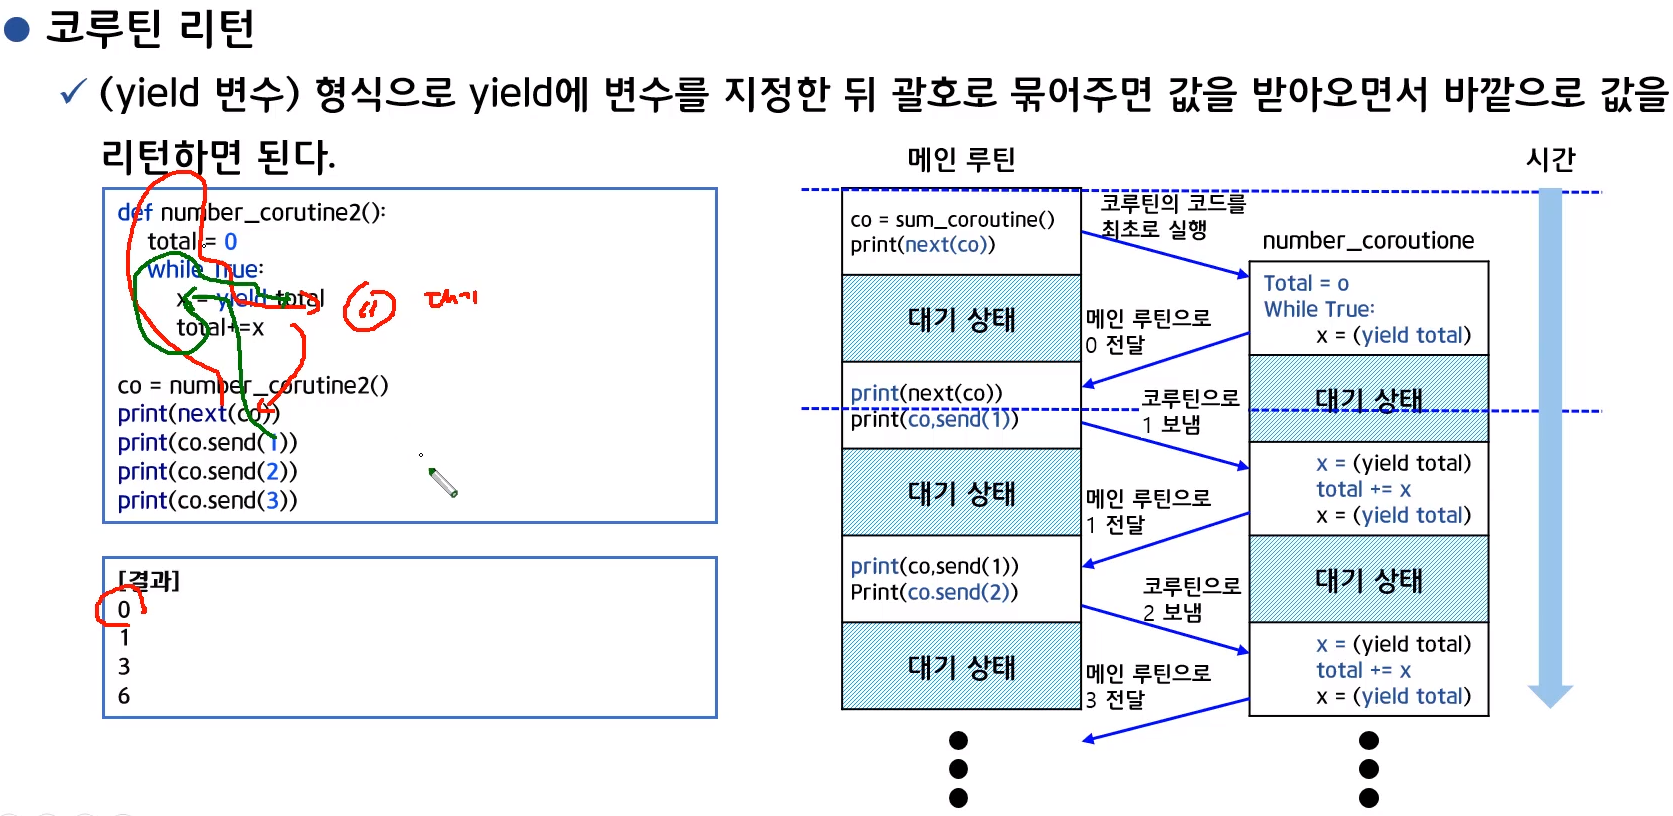
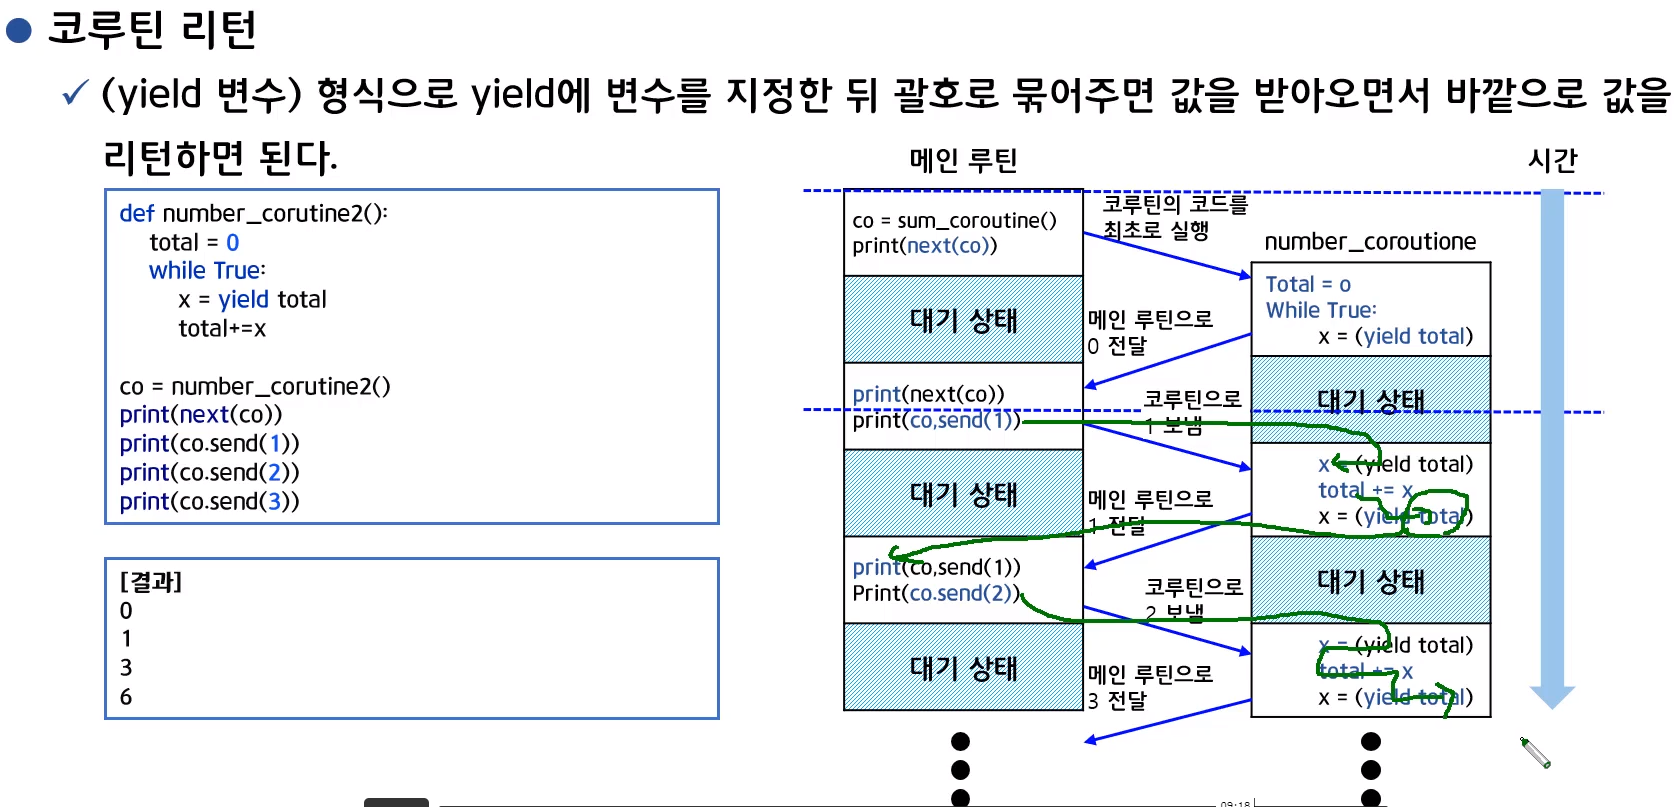

In [141]:
# 코루틴 예외처리
# 코루틴을 강제로 종료하고 싶으면 close method를 사용하면 된다. => 실행시 내부적으론 except GeneratorExit 가 실행 된다.
# RuntimeError 예외를 발생하면 에러 메시지를 출력하고 누적된 값을 코루틴 바깥으로 전달한다

def number_coroutine3():
    try:
        while True:
            x = (yield)
            print(x)
    except GeneratorExit:
        print('coroutine end!')
        
co = number_coroutine3()
next(co)

for i in range(5):
    co.send(i)
co.close()


#외부에서 강제로 coroutine을 종료하고 시싶으면 아래와 처럼 하면 된다.
def number_coroutine4():
    total = 0
    try:
        while True: #무한 loop
            x = (yield)
            total += x
    except RuntimeError as e:
        print(e)
        yield total
        
co = number_coroutine4()
next(co)

for i in range(20):
    co.send(i)

print(co.throw(RuntimeError, '강제 예외 발생하여 코루틴 종료!'))

0
1
2
3
4
coroutine end!
강제 예외 발생하여 코루틴 종료!
190


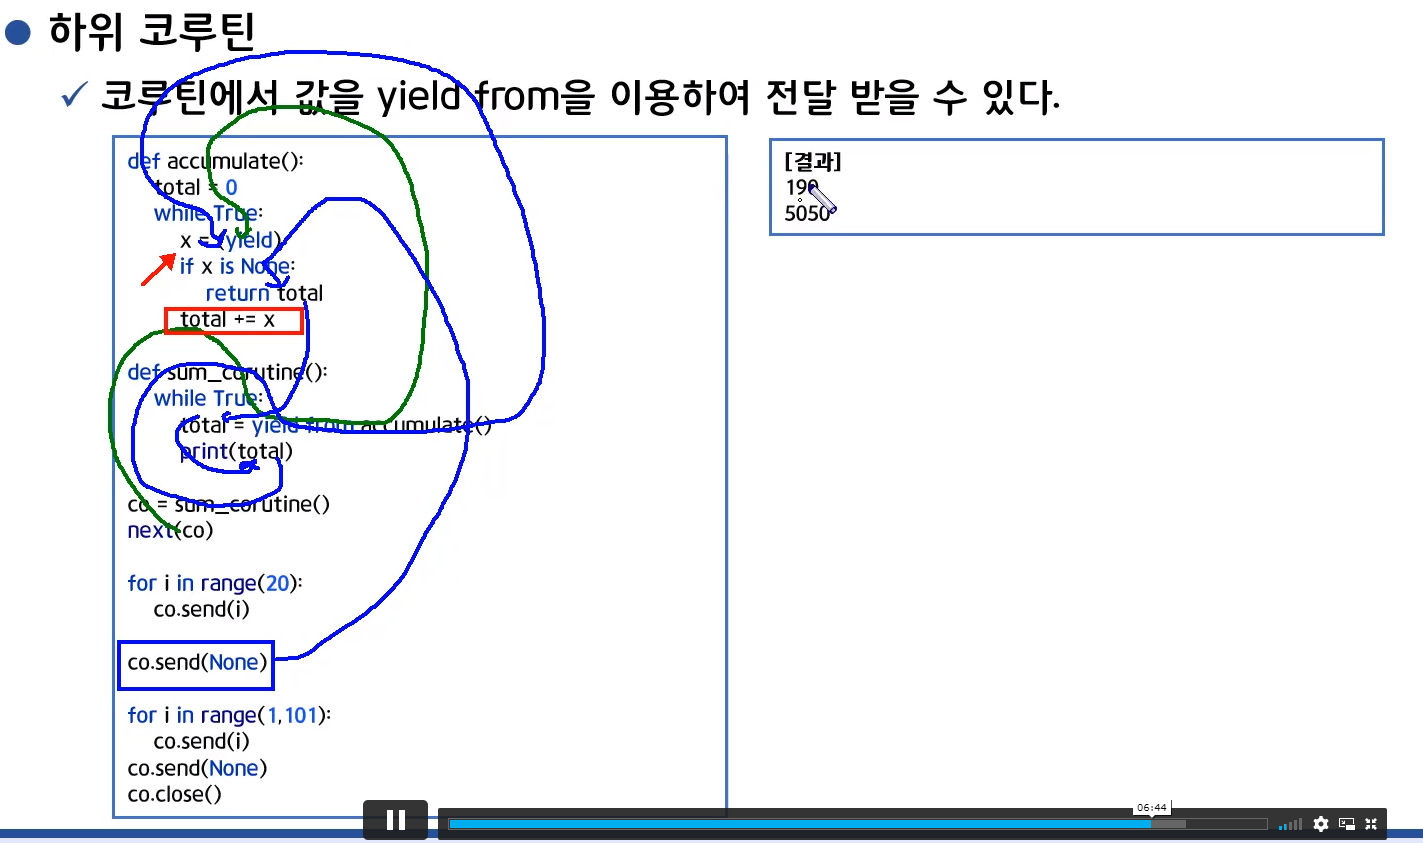

In [143]:
# 하위 코루틴
# 코루틴에서 값을 yield from을 이용하여 전달 받을 수 있다. 위 그림 참고

def accumulate():
    total = 0
    while True:
        x = (yield)
        if x is None:
            return total
        total += x
    
def sum_coroutine():
    while True:
        total = yield from accumulate()
        print(total)
        
co = sum_coroutine()
next(co)

for i in range(20):
    co.send(i)

co.send(None)

for i in range(1, 101):
    co.send(i)
co.send(None)
co.close()

190
5050
